# Corrective RAG

- Corrective-RAG (CRAG) is a strategy for RAG by adding an intelligent evaluation and correction layer to improve the accuracy and reliability of responses, reducing hallucinations.

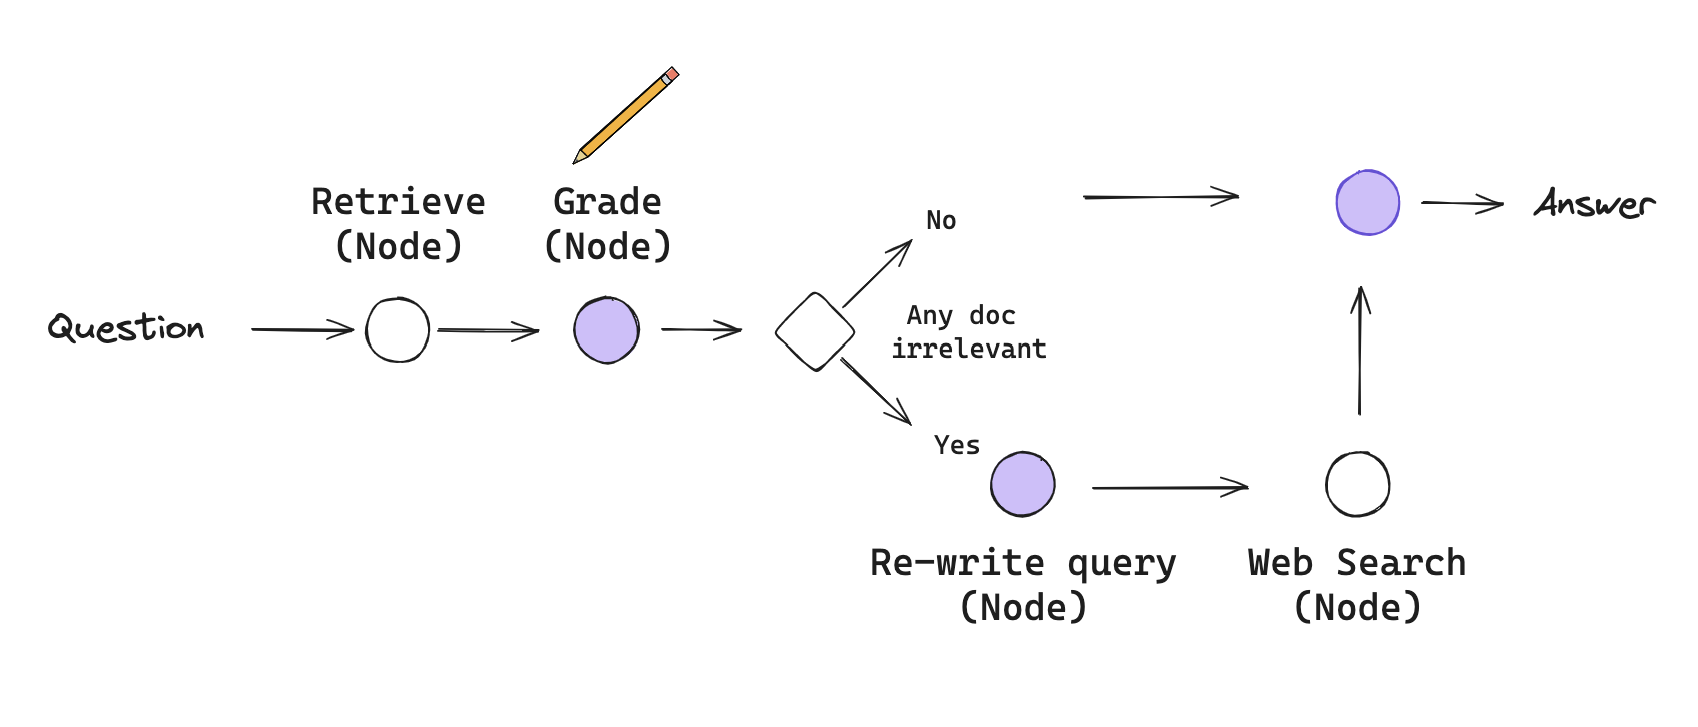

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["HF_TOKEN"]=os.getenv("HF_TOKEN")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
import os
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")


In [45]:
from langchain_classic.text_splitter import RecursiveCharacterTextSplitter
from langchain_classic.document_loaders import WebBaseLoader
from langchain_classic.vectorstores import FAISS
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings

In [46]:
urls=[
    "https://docs.langchain.com/oss/python/langchain/rag",
    "https://docs.langchain.com/oss/python/langchain/sql-agent",
    "https://docs.langchain.com/oss/python/langchain/supervisor",
    "https://docs.langchain.com/oss/python/langchain/voice-agent"
]

docs=[WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langchain/rag', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...‚åòKSupportGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentVoice agentMulti-agentLangGraphConceptual overviewsComponent architectureMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesGet helpOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and generationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent with LangChainCopy pageCopy page‚ÄãOverview\nOne of the most po

In [47]:

docs_list=[item for sublist in docs for item in sublist]
docs_list

[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langchain/rag', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...‚åòKSupportGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentVoice agentMulti-agentLangGraphConceptual overviewsComponent architectureMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesGet helpOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and generationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent with LangChainCopy pageCopy page‚ÄãOverview\nOne of the most pow

In [48]:
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=1000,chunk_overlap=200)
embeddings=HuggingFaceEmbeddings(model="all-MiniLM-L6-v2")
llm=ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")
llm.invoke("hi")

AIMessage(content='Hi! How are you today? Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 11, 'total_tokens': 34, 'completion_time': 0.06014975, 'prompt_time': 4.9089e-05, 'queue_time': 0.068052535, 'total_time': 0.060198839}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_ba95244fa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--80bd7a3b-4e51-40c0-84e5-eb0a72be5fc7-0', usage_metadata={'input_tokens': 11, 'output_tokens': 23, 'total_tokens': 34})

In [49]:
doc_splits=text_splitter.split_documents(docs_list)

vector_store=FAISS.from_documents(doc_splits,embeddings)

retriever=vector_store.as_retriever()

In [50]:
retriever.invoke("what is sql agent")

[Document(id='cc2131db-a688-4be1-b507-c992f0fedb7c', metadata={'source': 'https://docs.langchain.com/oss/python/langchain/sql-agent', 'title': 'Build a SQL agent - Docs by LangChain', 'language': 'en'}, page_content='Build a SQL agent - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...‚åòKSupportGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a SQL agentLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentVoice agentMulti-agentLangGraphConceptual overviewsComponent architectureMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesGet helpOn this pageOverviewConceptsSetupInstallationLangSmith1. Select an LLM2. Configure the database3. Add tools for database interactions4. Use create_agent5. Run the agent(Optional) Use Studio6. Implement human-in-the-loop reviewNext stepsTutorialsLangChainBuild a SQL agentCopy pageCopy pag

#### GRAPH STATE

In [51]:
from typing import List
from langchain_classic.schema import Document
from typing_extensions import TypedDict
class GraphState(TypedDict):
    " Represents the state of the graph"

    question:str
    generation:str
    web_search:str
    documents:List[Document]
    

#### RETRIEVE NODE

In [52]:
def retrieve(state):
    "Retrieve documents from the vector store by using retriever"

    print("---RETRIEVE---")
    question=state["question"]

    documents=retriever.invoke(question)


    return {"documents":documents,"question":question}

#### DOCUMENTS GRADING NODE

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

from pydantic import BaseModel, Field

def grade(state):
    "Checks whether the retrieved documents are relevant to the question"
    print("---CHECK DOCUMENT RELEVANCE TO THE QUERY---")

    class GradeDocuments(BaseModel):
        """Binary score for relevance check on retrieved documents."""

        binary_score: str = Field(
            description="Documents are relevant to the question, 'yes' or 'no'"
        )

    llm_grader=llm.with_structured_output(GradeDocuments)

    
    # Prompt
    system = """You are a grader assessing relevance of a retrieved document to a user question. \n 
        If the document contains keyword(s) or semantic meaning related to the question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""
    grade_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
        ]
    )
    retrieval_grader=grade_prompt|llm_grader

    question=state["question"]
    documents=state["documents"]

    # Score each doc
    filtered_docs = []
    web_search = "No"
    for d in documents:
        score = retrieval_grader.invoke(
            {"question": question, "document": d.page_content}
        )
    grade = score.binary_score
    if grade == "yes":
        print("---GRADE: DOCUMENT RELEVANT---")
        filtered_docs.append(d)
    else:
        print("---GRADE: DOCUMENT NOT RELEVANT---")
        web_search = "Yes"
        

    return {"documents": filtered_docs, "question": question, "web_search": web_search}



In [54]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("rlm/rag-prompt", include_model=True)

In [55]:
from langchain_core.output_parsers import StrOutputParser


rag_chain=prompt|llm


#### GENERATE NODE

In [56]:
def generate(state):
    " generate answer "

    print("---Generate---")
    question=state["question"]
    documents=state["documents"]


    # Convert Document objects → strings
    context = "\n\n".join(
        d.page_content if hasattr(d, "page_content") else str(d)
        for d in documents
    )

    generation=rag_chain.invoke({"context":context,"question":question})
    
    return {"documents":documents,"question":question,"generation":generation}

#### RE-WRITE QUERY NODE

In [57]:
def rewrite_query(state):
    "Transform the query to produce a better question"

    print("---REWRITE QUERY---")

    # Prompt
    system = """You are a query rewriting agent.

        Rewrite the user's question to a SHORT, SEARCH-OPTIMIZED QUESTION.

        RULES:
        - Return ONLY the rewritten question.
        - DO NOT add explanations.
        - DO NOT say "based on the original question".
        - DO NOT create paragraphs.
        - NO formatting.
        - NO markdown.
        - ONLY return the rewritten question, nothing else.
        """
    re_write_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            (
                "human",
                "Here is the initial question: \n\n {question} \n Formulate an improved question.",
            ),
        ]
    )

    question_rewriter = re_write_prompt | llm | StrOutputParser()
    question=state["question"]
    documents=state["documents"]

    new_question=question_rewriter.invoke({"question":question})

    print(new_question)

    return {"documents":documents,"question":new_question}



In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
web_search_tool = TavilySearchResults(k=3)

#### WEB SEARCH NODE

In [ ]:
from langchain_classic.schema import Document

def web_search(state):
    """
    Web search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """


    print("---WEB SEARCH---")
    question=state["question"]
    documents=state["documents"]

    docs=web_search_tool.invoke({"query":question})
    normalized_docs = []

    # Case 1: list of dicts
    if isinstance(docs, list):
        for d in docs:
            if isinstance(d, dict) and "content" in d:
                normalized_docs.append(Document(page_content=d["content"]))
            elif isinstance(d, Document):
                normalized_docs.append(d)

    # Case 2: single string
    elif isinstance(docs, str):
        normalized_docs.append(Document(page_content=docs))

    # Case 3: anything else
    else:
        normalized_docs.append(Document(page_content=str(docs)))

    return {"documents": normalized_docs}


#### ROUTING FUNCTION

In [60]:
def decide_generate(state):
    "Decides whether to generate an answer or re-generate a question"

    print("---DECIDE TO GENERATE OR RE-WRITE QUERY---")
    state["question"]
    web_search = state["web_search"]
    state["documents"]

    if web_search == "Yes":
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print("---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---")
        return "rewrite_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"


    

#### GRAPH STRUCTURE

In [61]:
from langgraph.graph import END, StateGraph, START

builder=StateGraph(GraphState)

builder.add_node("retrieve",retrieve)
builder.add_node("grade",grade)
builder.add_node("generate",generate)
builder.add_node("rewrite_query",rewrite_query)
builder.add_node("web_search",web_search)

builder.add_edge(START,"retrieve")
builder.add_edge("retrieve","grade")
builder.add_conditional_edges("grade",decide_generate,{"rewrite_query":"rewrite_query",
                                                       "generate":"generate"})

builder.add_edge("rewrite_query","web_search")

builder.add_edge("web_search","generate")

builder.add_edge("generate",END)

graph=builder.compile()


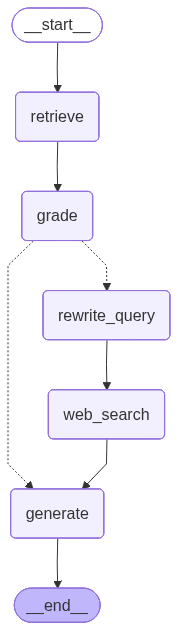

In [62]:
from IPython.display import display,Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [63]:
graph.invoke({"question":"What supervisor agent?"})

---RETRIEVE---
---CHECK DOCUMENT RELEVANCE TO THE QUERY---
---GRADE: DOCUMENT NOT RELEVANT---
---DECIDE TO GENERATE OR RE-WRITE QUERY---
---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---
---REWRITE QUERY---
What is a supervisor agent?
---WEB SEARCH---
---Generate---


{'question': 'What is a supervisor agent?',
 'generation': AIMessage(content='A supervisor agent is a central agent that coordinates and manages the work of specialized sub-agents or worker agents, delegating tasks and responsibilities to them. It collects input, maintains structured memory, and orchestrates the execution of sub-agents based on predefined logic. The supervisor agent serves as a hub that routes questions, breaks down user requests, and ensures efficient and structured execution of complex tasks.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 1789, 'total_tokens': 1868, 'completion_time': 0.203709412, 'prompt_time': 0.050110566, 'queue_time': 0.105801238, 'total_time': 0.253819978}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_ba95244fa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--e6ed0702-254c-4044-b31f-35a127